In [1]:
from __future__ import division
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

import random

## 1 

In [2]:
def relu(z):
    return np.where(z > 0, z, 0)

def sigmoid(z):
    '''
    sigmoid activation function
    '''
    return 1/(1+np.exp(-z))

In [6]:
def ff_nn_ReLu(X, W, b, V, c):

    res = relu(np.array(X)@np.array(W)+b)
    return sigmoid(np.dot(res,np.array(V))+c)

    

In [7]:
x = [[1,-1], [0,-1], [0, 1]]
w = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
v = [1, 0, -1, 1]
c = 1

ff_nn_ReLu(x,w,b,v,c)

array([0.81757448, 0.62245933, 0.62245933])

## 2

1. $$f_x(x,y) = -3x^2-100(2y^2-x)$$
$$f_y(x,y) = 400y\cdot(2y^2-x)$$

2.

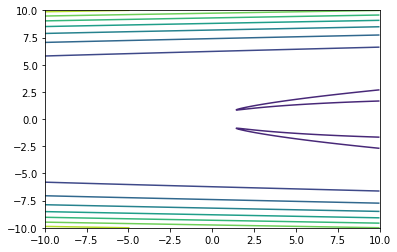

In [29]:
x = np.linspace(-10.0, 10.0, 1000)
y = np.linspace(-10.0, 10.0, 1000)
X, Y = np.meshgrid(x, y)
Z = 3-X**3 +  50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

3.

In [39]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-100*(2*y**2-x)
    df_dy = 400*y*(2*y**2-x)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):    
    if starting_point == None:
        x = 10
        y = 10
    else:
        x = starting_point[0]
        y = starting_point[1]
    trajs = [(x,y)]
    for i in range(iterations):
        g = grad_f((x,y))
        x = x-learning_rate*g[0]
        y = y-learning_rate*g[1]
        trajs.append([x,y])
    return np.array(trajs)

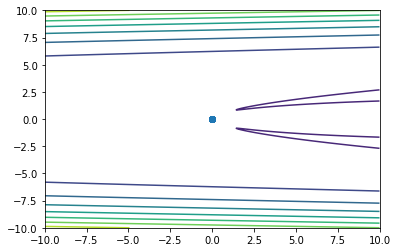

In [42]:
np.random.seed(10)
traj = grad_descent([0,0],iterations=10, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [46]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point == None:
        x = 10
        y = 10
    else:
        x = starting_point[0]
        y = starting_point[1]
    v = np.zeros(np.shape(np.array([0,0])))
    trajs = [(x,y)]
    for _ in range(iterations):
        g = grad_f((x,y))
        v = alpha*v - epsilon*g
        x = x+v[0]
        y = y+v[1]
        trajs.append([x,y])
        
        
    return np.array(trajs)

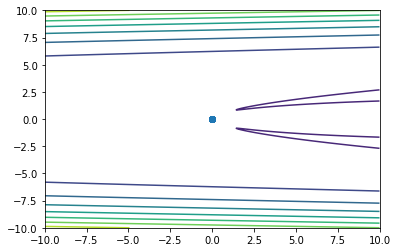

In [48]:
np.random.seed(10)
traj = grad_descent_with_momentum((0,0),iterations=10, epsilon=0.2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3

In [152]:
def grad_f(x, y, y_hat, w, b, v, c):
    d_loss_y_hat = y/y_hat-(1-y)/(1-y_hat)
    h = relu(np.array(x)@np.array(w)+b)
    
    dw = x.T.dot(np.expand_dims((d_loss_y_hat * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
    db = (d_loss_y_hat* y_hat*(1-y_hat)).T.dot(np.where(h<=0,0,1))*v
    
    dv = (d_loss_y_hat* y_hat*(1-y_hat)).T.dot(h)
    dc = d_loss_y_hat.dot( y_hat*(1-y_hat) )
    
    return dw,db,dv,dc
    

In [153]:
x = np.array([[1,-1], [0,-1], [0, 1]])
w = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
v = np.array([1, 0, -1, 1])
c = 1
y_pred = ff_nn_ReLu(x,w,b,np.array(v),c)

In [154]:
print(grad_f(x, np.array([1,1,1]),y_pred,w,b,v,c))

(array([[ 0.18242552,  0.        , -0.18242552,  0.18242552],
       [-0.18242552,  0.        ,  0.18242552, -0.18242552]]), array([ 0.18242552,  0.        , -0.93750686,  0.37754067]), array([0.18242552, 0.        , 0.8462941 , 0.37754067]), 0.9375068614026474)


In [74]:
np.dot(np.array([[1,0,0.5,0],[1,0,0.5,0]]),v)

array([0.5, 0.5])

In [46]:
np.shape(v)

(4,)

In [82]:
np.sum(x,axis=0)

array([ 1, -1])

In [109]:
h = relu(np.array(x)@np.array(w)+b)
np.where(h<=0,0,1).T@x

array([[ 1, -1],
       [ 0,  0],
       [ 1, -1],
       [ 0,  1]])

In [107]:
h.T

array([[1. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0.5, 0.5, 1.5],
       [0. , 0. , 1. ]])

In [106]:
x

array([[ 1, -1],
       [ 0, -1],
       [ 0,  1]])